In [2]:
%pip install svgling
import nltk
import svgling
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
paragraph = """
I’ve got epilepsy from a head injury, after I was seriously beaten up in
Newcastle, so I can’t work easily. I’m on disability benefits, but the red tape
for accommodation is unbelievable; endless forms to fill out. I want to be put
in a hostel in Tower Hamlets, where my dad lives, but they won’t listen. I’ve
got a court case outstanding; one of the local churches had me locked up when
my sister died and that makes things more complicated. I just hope I don’t end
up in jail. If I'm lucky I could get a job at Mcdonalds
"""

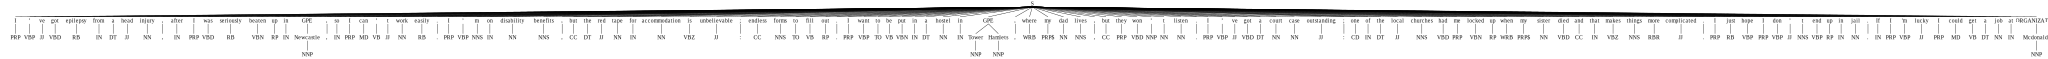

In [ ]:
tokens = nltk.word_tokenize(paragraph)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
entities

In [ ]:
nouns = [token for token, pos in tagged if pos.startswith('NNP')]
nouns

['Newcastle', 'Tower', 'Hamlets', '’', 'Mcdonalds']

In [ ]:
adjective = [token for token, pos in tagged if pos.startswith('J')]
adjective

['ve',
 'head',
 't',
 'red',
 'unbelievable',
 've',
 'outstanding',
 'local',
 'complicated',
 '’',
 'lucky']

In [ ]:
text = nltk.Text(word.lower() for word in tokens)
text

<Text: i ’ ve got epilepsy from a head...>

In [ ]:
for term in ['sad','homeless','shelter','disease','head']:
  print(f"{term}:",text.similar(term))

Text: <Text: i ’ ve got epilepsy from a head...>
No matches
sad: None
No matches
homeless: None
No matches
shelter: None
No matches
disease: None

head: None


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = paragraph.split('.')
print(corpus)
vectors = vectorizer.fit_transform(corpus)
vectors

['\nI’ve got epilepsy from a head injury, after I was seriously beaten up in \nNewcastle, so I can’t work easily', ' I’m on disability benefits, but the red tape \nfor accommodation is unbelievable; endless forms to fill out', ' I want to be put \nin a hostel in Tower Hamlets, where my dad lives, but they won’t listen', ' I’ve \ngot a court case outstanding; one of the local churches had me locked up when \nmy sister died and that makes things more complicated', ' I just hope I don’t end \nup in jail', " If I'm lucky I could get a job at Mcdonalds\n"]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
tfidf_corpus = tfidf.fit_transform(corpus)
tfidf_corpus

<6x77 sparse matrix of type '<class 'numpy.float64'>'
	with 87 stored elements in Compressed Sparse Row format>